# Lab01: Linear Regression.

- Student ID: 21127191
- Student name: Nguyễn Nhật Truyền

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [3]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

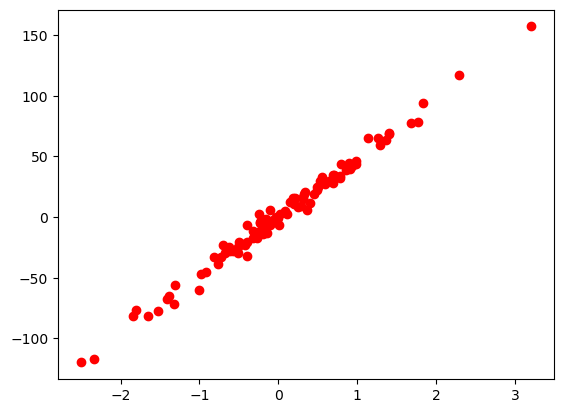

In [4]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data:</br>
    * The relationship can be visualized as a straight line.</br>
    * The data points not lie exactly on a perfect straight line, but rather have some deviation or scatter around the underlying linear relationship.

#### Training function

In [13]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [35]:
    # Construct one_added_X 
    # TODO:
    # First column of one_added_X is all ones (corresponding to x_0).
    ones_column = np.ones((X.shape[0], 1))
    one_added_X = np.concatenate((ones_column, X), axis=1)
    
    print ('one_added_X.shape =', one_added_X.shape)
    print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-2.793605390059005, 3.492846616299076)

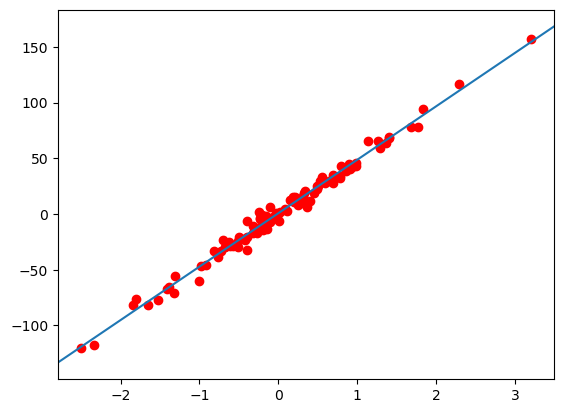

In [36]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
predicted_ys_xs = one_added_xs.dot(w)

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

## Advantages:
1. Interpretability: The results of linear regression are easy to interpret. The coefficients in the model represent the relationship between the independent and dependent variables, allowing for a clear understanding of the impact of each variable.</br>
2. Computational Efficiency: Linear regression has a closed-form solution, known as the normal equation, which makes it computationally efficient for small to moderately sized datasets. This allows for quick training and prediction times.</br>
3. No Assumption of Non-Linearity: While it's called "linear" regression, it can model non-linear relationships as well. This is because the linearity refers to the coefficients, not necessarily the variables themselves. Additionally, non-linear transformations of variables can be applied to capture more complex relationships.</br>
4. Ease of Implementation: Implementing linear regression is straightforward, making it a good starting point for beginners in the field of machine learning.</br>
5. Useful for Feature Selection: Linear regression can help identify which features have a significant impact on the dependent variable, which is useful for feature selection in more complex models.
## Disadvantages:
1. Assumption of Linearity: The model assumes that the relationship between the independent and dependent variables is linear. If the true relationship is highly non-linear, linear regression may not capture it effectively.</br>
2. Sensitivity to Outliers: Linear regression is sensitive to outliers. A single outlier can significantly impact the model parameters and predictions.</br>
3. Assumption of Independence: The model assumes that the residuals (the differences between the observed and predicted values) are independent. If this assumption is violated, it can lead to biased and inefficient parameter estimates.</br>
4. Assumption of Homoscedasticity: Homoscedasticity assumes that the variance of the residuals is constant across all levels of the independent variable. Heteroscedasticity (unequal variance) can lead to inefficient parameter estimates and can affect the statistical tests associated with the model.</br>
5. Limited to Linear Relationships: While non-linear relationships can be captured through feature engineering, highly complex non-linear relationships may not be adequately represented by linear regression.</br>
6. Multicollinearity: When independent variables are highly correlated, it can lead to multicollinearity issues, making it challenging to separate the individual effects of correlated variables.</br>
